In [64]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from matplotlib import pyplot as plt
from sklearn import cluster

In [65]:
df = pd.read_csv('data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [66]:
df_with_gdp = df[df.gdpp < df.gdpp.quantile(0.9)]
df_with_gdp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [67]:
columns = ['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer', 'gdpp',]
df_country_extend = df_with_gdp.drop(["country"], axis=1)
scal = sklearn.preprocessing.MinMaxScaler()
income = scal.fit_transform(df_country_extend)
income = pd.DataFrame(income, columns=df_country_extend.columns,
                      index=df_country_extend.index)
for column in columns:
    if column != 'child_mort' or column != 'inflation':
        income[column] = income[column].apply(lambda x: 1 - x)

income = df[["income", "gdpp", "child_mort"]]
income

,income,gdpp,child_mort
0,1610,553,90.2
1,9930,4090,16.6
2,12900,4460,27.3
3,5900,3530,119.0
4,19100,12200,10.3
...,...,...,...
162,2950,2970,29.2
163,16500,13500,17.1
164,4490,1310,23.3
165,4480,1310,56.3


C:\Users\38073\AppData\Local\Temp\ipykernel_4216\2446298690.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_range = distance_range.append({'index': str(i), 'distance': dist}, ignore_index=True)
C:\Users\38073\AppData\Local\Temp\ipykernel_4216\2446298690.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_range = distance_range.append({'index': str(i), 'distance': dist}, ignore_index=True)
C:\Users\38073\AppData\Local\Temp\ipykernel_4216\2446298690.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_range = distance_range.append({'index': str(i), 'distance': dist}, ignore_index=True)
C:\Users\38073\AppData\Local\Temp\ipykernel_4216\2446298690.py:5: FutureWarning: The frame.append method is depr

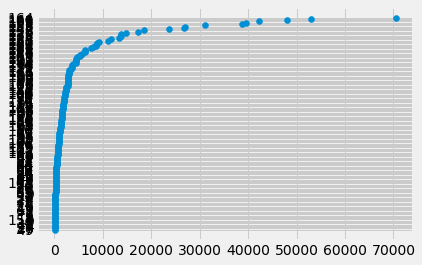

In [68]:
sorted_income = income.sort_values(by=["income", "gdpp"])
distance_range = pd.DataFrame(columns=["index", "distance"])
for i in range(0, len(sorted_income) - 1):
    dist = np.linalg.norm(sorted_income.iloc[i] - sorted_income.iloc[i + 1])
    distance_range = distance_range.append({'index': str(i), 'distance': dist}, ignore_index=True)
distance_range = distance_range.sort_values(by=["distance"])
plt.scatter(distance_range["distance"], distance_range["index"])
plt.show()

In [69]:
range_eps = (0.05 + x * 0.05 for x in range(5))
for i in range_eps:
    db = sklearn.cluster.DBSCAN(eps=i, min_samples=5).fit(income)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))

{-1}
{-1}
{-1}
{-1}
{-1}


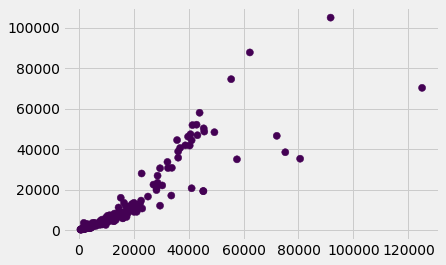

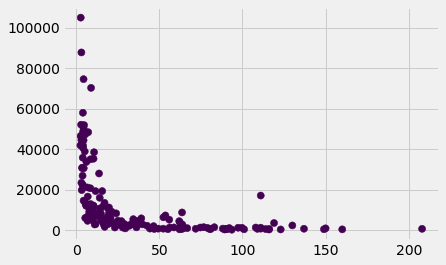

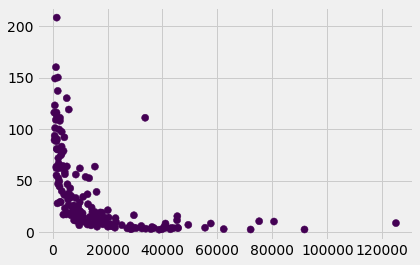

In [70]:
data_dbscan = sklearn.cluster.DBSCAN(eps=0.2, min_samples=20).fit_predict(income)
plt.scatter(income["income"], income["gdpp"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["child_mort"], income["gdpp"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["income"], income["child_mort"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()

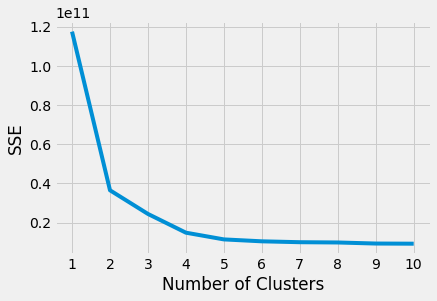

In [71]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(income)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [72]:
clusters_num = 3
clusters_num

3

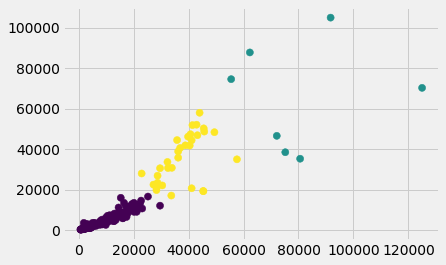

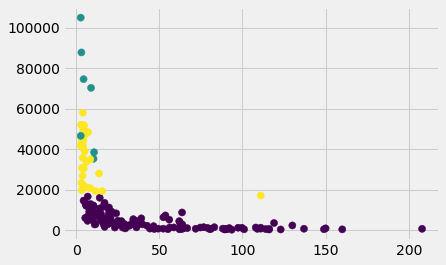

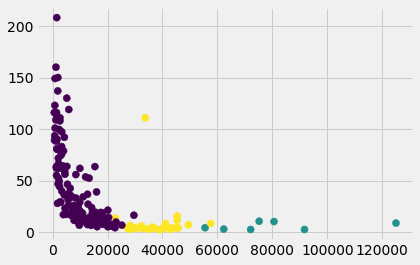

In [73]:
gdp_kmeans_labels = cluster.KMeans(clusters_num).fit_predict(income)
plt.scatter(income["income"], income["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["child_mort"], income["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["income"], income["child_mort"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()

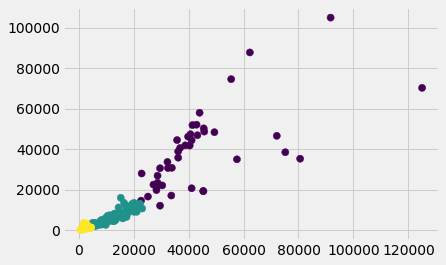

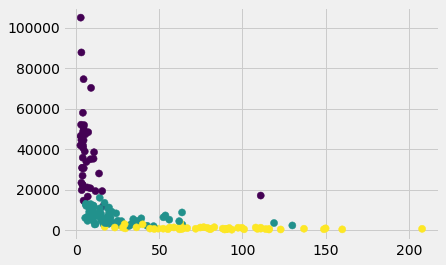

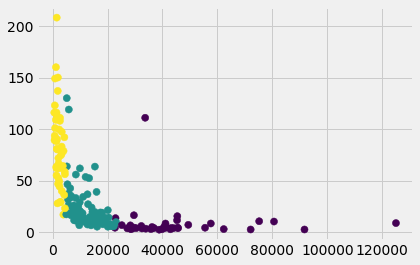

In [74]:
gdp_spectral_labels = cluster.SpectralClustering(n_clusters=clusters_num, affinity="nearest_neighbors", assign_labels="kmeans").fit_predict(income)
plt.scatter(income["income"], income["gdpp"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["child_mort"], income["gdpp"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["income"], income["child_mort"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()

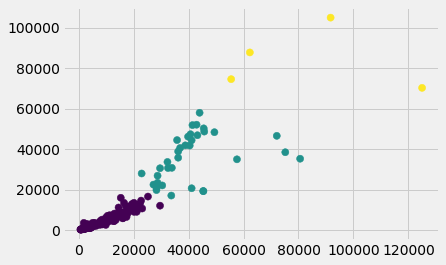

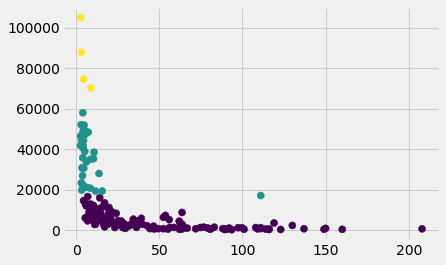

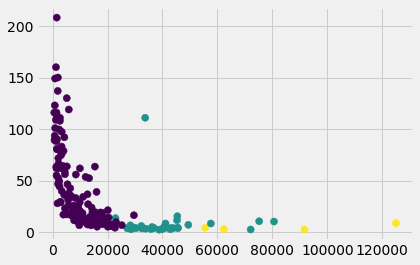

In [75]:
gdp_mini_kmeans_labels = cluster.MiniBatchKMeans(clusters_num).fit_predict(income)
plt.scatter(income["income"], income["gdpp"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["child_mort"], income["gdpp"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income["income"], income["child_mort"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()